In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
import pandas as pd

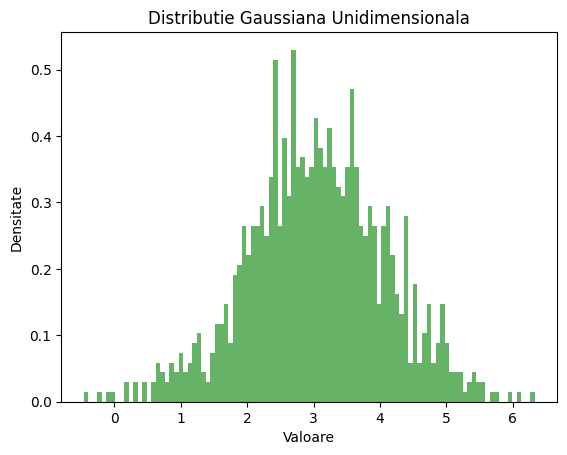

In [89]:
media = 3
varianta = 1

date = np.random.normal(media, np.sqrt(varianta), 1000)

plt.hist(date, bins=100, density=True, alpha=0.6, color='g')
plt.title('Distributie Gaussiana Unidimensionala')
plt.xlabel('Valoare')
plt.ylabel('Densitate')
plt.savefig("grafice/ex1a.pdf", format="pdf")
plt.savefig("grafice/ex1a.png", format="png")
plt.show()


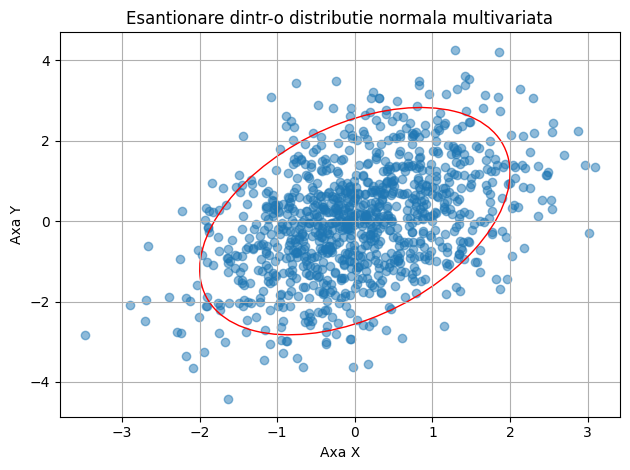

In [6]:
from matplotlib.patches import Ellipse
def plot_ellipse(ax, mean, covariance_matrix, color='red', label='Covariance Ellipse'):
    vals, vect = np.linalg.eig(covariance_matrix)
    angle = np.degrees(np.arctan2(vect[1, 0], vect[0, 0]))

    width, height = 4* np.sqrt(vals)

    ell = Ellipse(xy=mean, width=width, height=height, angle=angle, color=color, fill=False, label=label)
    ax.add_patch(ell)
    
def sample_from_multivariate_normal(mean, covariance_matrix, num_samples=1):
    vals, vect = np.linalg.eig(covariance_matrix)
    sampled_data = np.zeros((num_samples, len(mean)))

    for i in range(num_samples):
        n = np.random.randn(len(mean))
        sample = mean + np.dot(vect, np.real(np.sqrt(np.diag(vals))).dot(n))
        sampled_data[i, :] =  np.real(sample)

    return sampled_data

mean = np.array([0, 0])
covariance_matrix = np.array([[1, 3/5], [3/5, 2]])
num_samples = 1000

samples = sample_from_multivariate_normal(mean, covariance_matrix, num_samples)
plt.scatter(samples[:, 0], samples[:, 1], alpha=0.5)
plt.title('Esantionare dintr-o distributie normala multivariata')
plt.xlabel('Axa X')
plt.ylabel('Axa Y')
plt.grid(True)


plot_ellipse(plt.gca(), mean, covariance_matrix)
plt.tight_layout()
plt.savefig("grafice/ex1b.pdf", format="pdf")
plt.savefig("grafice/ex1b.png", format="png")
plt.show()

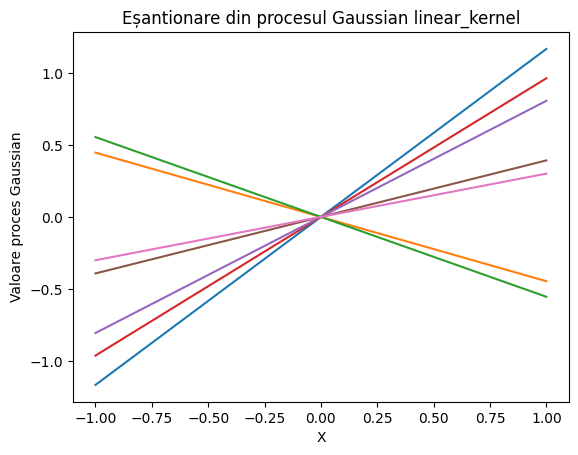

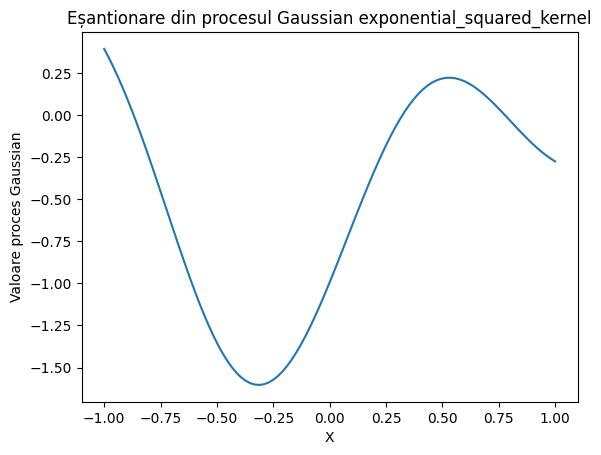

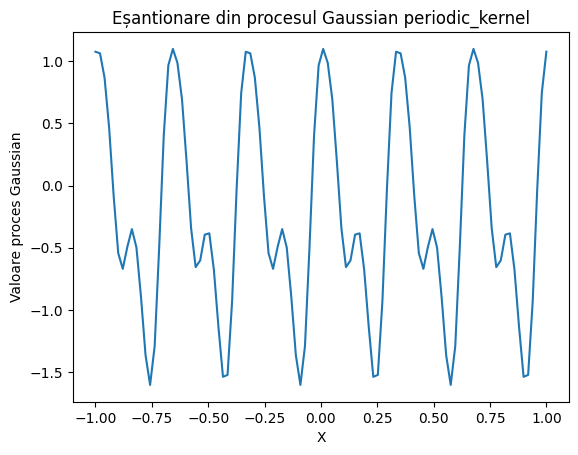

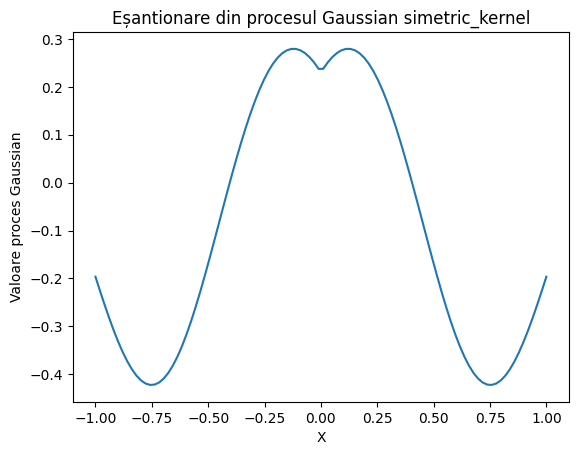

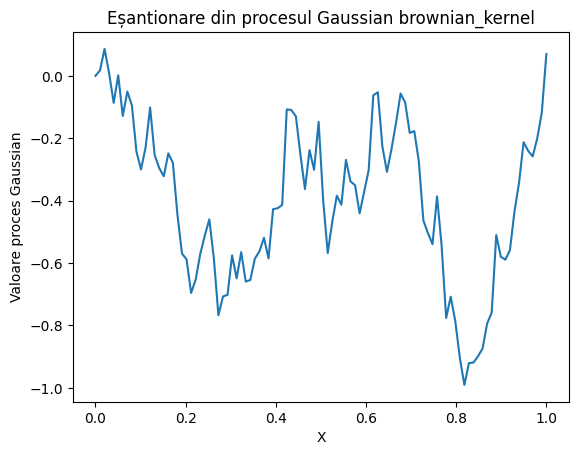

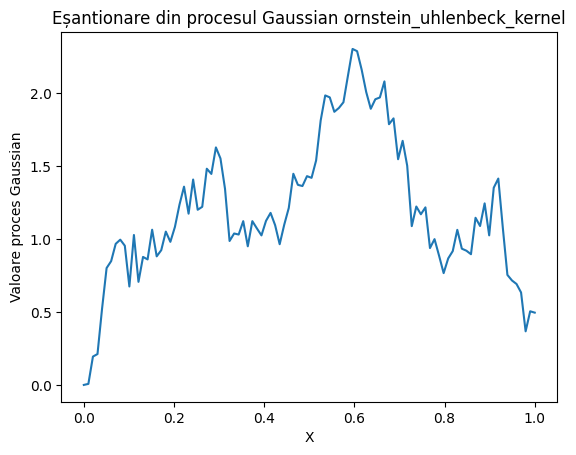

In [88]:
def linear_kernel(x, y):
    return np.dot(x.T, y)

def brownian_kernel(s, t):
    return min(s, t)

def exponential_squared_kernel(x, y, alpha=2):
    return np.exp(-alpha * np.linalg.norm(x - y)**2)

def ornstein_uhlenbeck_kernel(s, t, alpha=2):
    return np.exp(-alpha * np.abs(s - t))

def periodic_kernel(x, y, alpha=2, beta=3):
    return np.exp(-alpha * np.sin(beta * np.pi * np.linalg.norm(x - y))**2)

def simetric_kernel(x, y, alpha=2):
    return np.exp(-alpha * np.min([np.abs(x - y), np.abs(x + y)])**2)


def plot_gaussian_process(kernel_func,samples,nr,interval):
    x_int = np.linspace(interval[0], interval[1], samples)
    y_int = np.linspace(interval[0], interval[1], samples)

    covariance_matrix = np.zeros((samples, samples))

    for i in range(samples):
        for j in range(samples):
            covariance_matrix[i, j] = kernel_func(x_int[i], y_int[j])


    mean = np.zeros(samples)
    sample = sample_from_multivariate_normal(mean,covariance_matrix,nr)

    for s in sample:
        plt.plot(x_int, s)

    plt.title(f'Eșantionare din procesul Gaussian {kernel_func.__name__}')
    plt.xlabel('X')
    plt.ylabel('Valoare proces Gaussian')
    plt.savefig(f"grafice/ex2_{kernel_func.__name__}.pdf", format="pdf")
    plt.savefig(f"grafice/ex2_{kernel_func.__name__}.png", format="png")
    plt.show()


samples =100
interval = [-1,1]
nr =7
plot_gaussian_process(linear_kernel,samples,nr,interval)
nr = 1
plot_gaussian_process(exponential_squared_kernel,samples,nr,interval)
plot_gaussian_process(periodic_kernel,samples,nr,interval)
plot_gaussian_process(simetric_kernel,samples,nr,interval)

interval = [-0,1]
plot_gaussian_process(brownian_kernel,samples,nr,interval)
plot_gaussian_process(ornstein_uhlenbeck_kernel,samples,nr,interval)


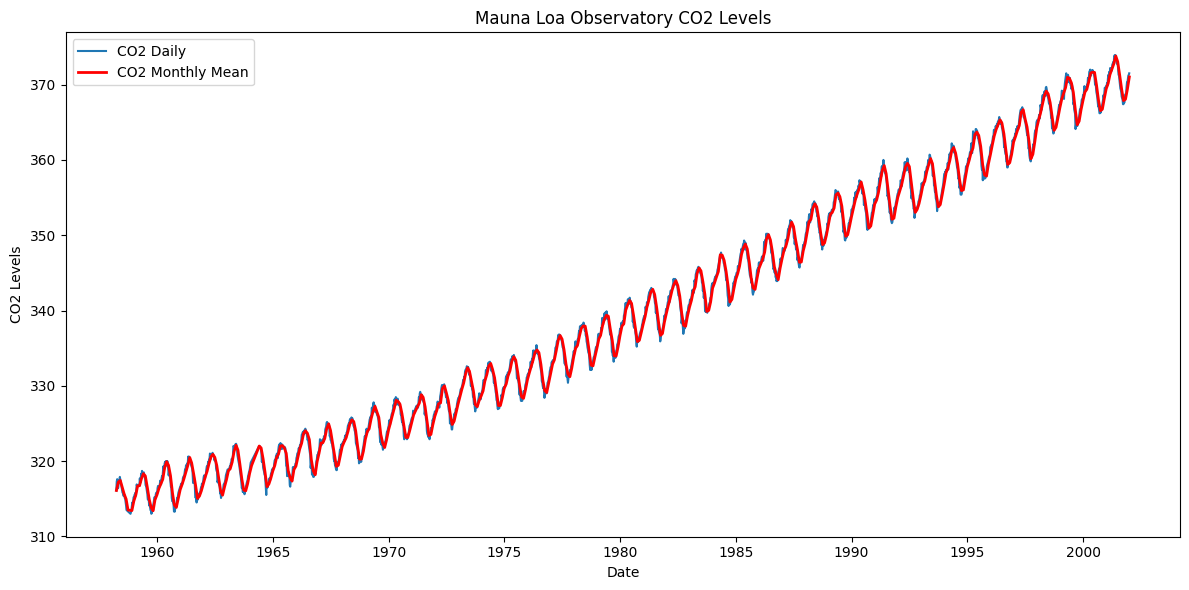

In [3]:
co2 = fetch_openml(data_id=41187, as_frame=True,parser='auto')
co2.frame.head()

co2_data = co2.frame
co2_data["date"] = pd.to_datetime(co2_data[["year", "month", "day"]])
co2_data = co2_data[["date", "co2"]].set_index("date")

co2_monthly_mean = co2_data.resample('M').mean().dropna(axis="index", how="any")

plt.figure(figsize=(12, 6))
plt.plot(co2_data, label='CO2 Daily')
plt.plot(co2_monthly_mean, label='CO2 Monthly Mean', linewidth=2, color='red')
plt.title('Mauna Loa Observatory CO2 Levels')
plt.xlabel('Date')
plt.ylabel('CO2 Levels')
plt.legend()
plt.tight_layout()
plt.savefig("grafice/ex3a.pdf", format="pdf")
plt.savefig("grafice/ex3a.png", format="png")
plt.show()



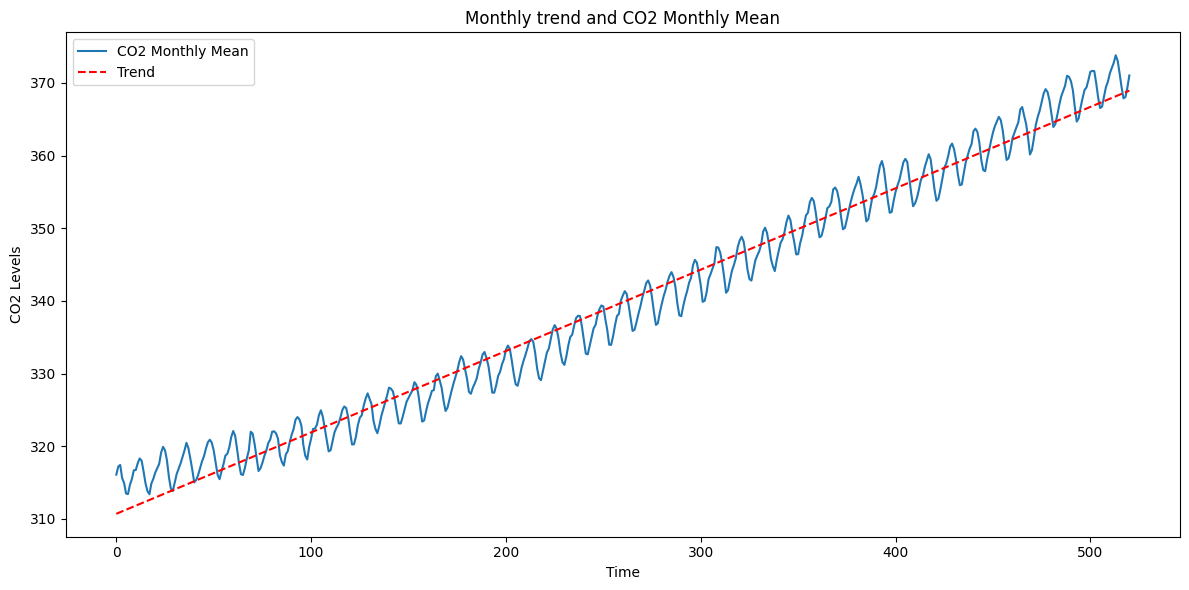

In [4]:
co2_monthly = np.array(co2_monthly_mean['co2'].values)
time = np.arange(len(co2_monthly))

slope, offset = np.polyfit(time, co2_monthly, deg=1)

# valorile estimate pentru trend
trend_values = slope * time + offset

# eliminarea trendului din datele lunare
detrended_data = co2_monthly - trend_values

plt.figure(figsize=(12, 6))
plt.plot(time, co2_monthly, label='CO2 Monthly Mean')
plt.plot(time, trend_values, label='Trend', linestyle='--', color='red')
plt.title('Monthly trend and CO2 Monthly Mean')
plt.xlabel('Time')
plt.ylabel('CO2 Levels')
plt.legend()
plt.tight_layout()
plt.savefig("grafice/ex3b.pdf", format="pdf")
plt.savefig("grafice/ex3b.png", format="png")
plt.show()

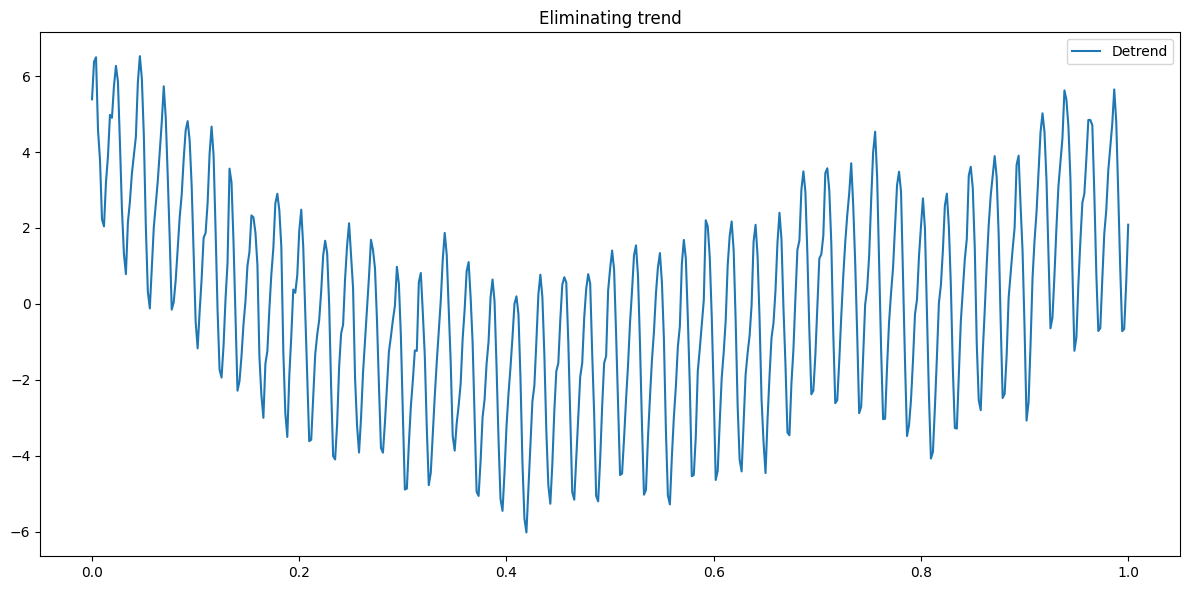

In [54]:

plt.figure(figsize=(12, 6))
plt.plot(time, detrended_data, label='Detrend')
plt.title('Eliminating trend')
plt.legend()
plt.tight_layout()
plt.savefig("grafice/ex3bb.pdf", format="pdf")
plt.savefig("grafice/ex3bb.png", format="png")
plt.show()

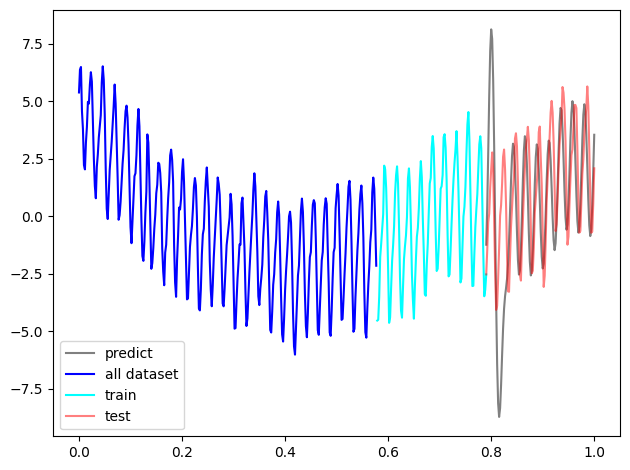

In [57]:
time = np.linspace(0,1,len(time))
def periodic_kernel(x, y, alpha =1, beta=1):
    return np.exp(-alpha * np.sin(beta * np.pi * np.linalg.norm(x - y))**2)

def covariance_matrix(t1,t2):
    covariance_matrix = np.zeros((len(t1),len(t2)))
    for x in range(len(t1)):
        for y in range(len(t2)):
            covariance_matrix[x][y] = periodic_kernel(t1[x],t2[y],2,4)
    return covariance_matrix

samples = 110
data_to_train = detrended_data[-2*samples:-samples+1]
time_to_train = time[-2*samples:-samples+1]
data_to_predict = detrended_data[-samples:]  
time_to_predict = time[-samples:]

# a = predict
# b = train
cbb = covariance_matrix(time_to_train,time_to_train)
cba = covariance_matrix(time_to_train,time_to_predict)
cab = covariance_matrix(time_to_predict,time_to_train)
caa = covariance_matrix(time_to_predict,time_to_predict)

m = np.mean(data_to_predict) + np.matmul(np.matmul(cab,np.linalg.pinv(cbb)),(data_to_train-np.mean(data_to_train))) 
D = caa-np.matmul(np.matmul(cab,np.linalg.pinv(cbb)),cba)

pred = sample_from_multivariate_normal(m,D)
plt.plot(time_to_predict,pred[0],color="grey",label = "predict")    

plt.plot(time[:-2*samples],detrended_data[:-2*samples],color="blue",label = "all dataset")    
plt.plot(time_to_train,data_to_train,color="aqua",label = "train")    
plt.plot(time_to_predict,data_to_predict,color="red", alpha=0.5,label = "test")    
plt.legend()
plt.tight_layout()
plt.savefig("grafice/ex3c.pdf", format="pdf")
plt.savefig("grafice/ex3c.png", format="png")
plt.show()